In [1]:
# import 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [2]:
# 데이터 불러오기
X_train = pd.read_csv('./datasets/X_train.csv')
y_train = pd.read_csv('./datasets/y_train.csv')
X_test = pd.read_csv('./datasets/X_test.csv')
y_test = pd.read_csv('./datasets/y_test.csv')

### 데이터 확인

In [3]:
X_train

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15799217,Zetticci,791,Germany,Female,35,7,52436.20,1,1,0,161051.75
1,15748986,Bischof,705,Germany,Male,42,8,166685.92,2,1,1,55313.51
2,15722004,Hsiung,543,France,Female,31,4,138317.94,1,0,0,61843.73
3,15780966,Pritchard,709,France,Female,32,2,0.00,2,0,0,109681.29
4,15636731,Ts'ai,714,Germany,Female,36,1,101609.01,2,1,1,447.73
...,...,...,...,...,...,...,...,...,...,...,...,...
6494,15702806,Martin,696,Spain,Male,24,9,0.00,1,0,0,10883.52
6495,15674179,Vorobyova,513,Germany,Male,34,7,60515.13,1,0,0,124571.09
6496,15790204,Myers,663,Spain,Female,22,9,0.00,1,1,0,29135.89
6497,15690772,Hughes,635,Spain,Female,48,2,0.00,2,1,1,136551.25


In [4]:
y_train

,CustomerId,Exited
0,15799217,0
1,15748986,0
2,15722004,0
3,15780966,0
4,15636731,0
...,...,...
6494,15702806,0
6495,15674179,0
6496,15790204,1
6497,15690772,0


In [5]:
X_test

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15601012,Abdullah,802,France,Female,60,3,92887.06,1,1,0,39473.63
1,15734762,Ignatiev,602,France,Female,56,3,115895.22,3,1,0,4176.17
2,15586757,Anenechukwu,801,France,Female,32,4,75170.54,1,1,1,37898.50
3,15590888,Wade,693,Spain,Female,34,10,107556.06,2,0,0,154631.35
4,15726087,Ch'in,592,France,Female,62,5,0.00,1,1,1,100941.57
...,...,...,...,...,...,...,...,...,...,...,...,...
3496,15733966,Johnstone,496,Germany,Female,55,4,125292.53,1,1,1,31532.96
3497,15669994,Greece,556,Germany,Female,31,1,128663.81,2,1,0,125083.29
3498,15712403,McMillan,589,France,Female,61,1,0.00,1,1,0,61108.56
3499,15643819,Dawson,714,France,Female,25,4,0.00,2,0,0,82500.84


### 데이터 설명

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       6499 non-null   int64  
 1   Surname          6499 non-null   object 
 2   CreditScore      6499 non-null   int64  
 3   Geography        6499 non-null   object 
 4   Gender           6499 non-null   object 
 5   Age              6499 non-null   int64  
 6   Tenure           6499 non-null   int64  
 7   Balance          6499 non-null   float64
 8   NumOfProducts    6499 non-null   int64  
 9   HasCrCard        6499 non-null   int64  
 10  IsActiveMember   6499 non-null   int64  
 11  EstimatedSalary  6499 non-null   float64
dtypes: float64(2), int64(7), object(3)
memory usage: 609.4+ KB


* CustomerId : 고객 ID
* Surname : 이름의 성
* CreditScore : 신용점수
* Geography : 국가
* Gender :성별
* Age : 나이
* Tenure : 보유? / 재직기간?
* Balance : 균형...?
* NumOfProducts : 제품 넘버
* HasCrCard : 카드 보유
* IsActiveMember : 정회원
* EstimatedSalary : 추정 봉급

### column 별 바 그래프

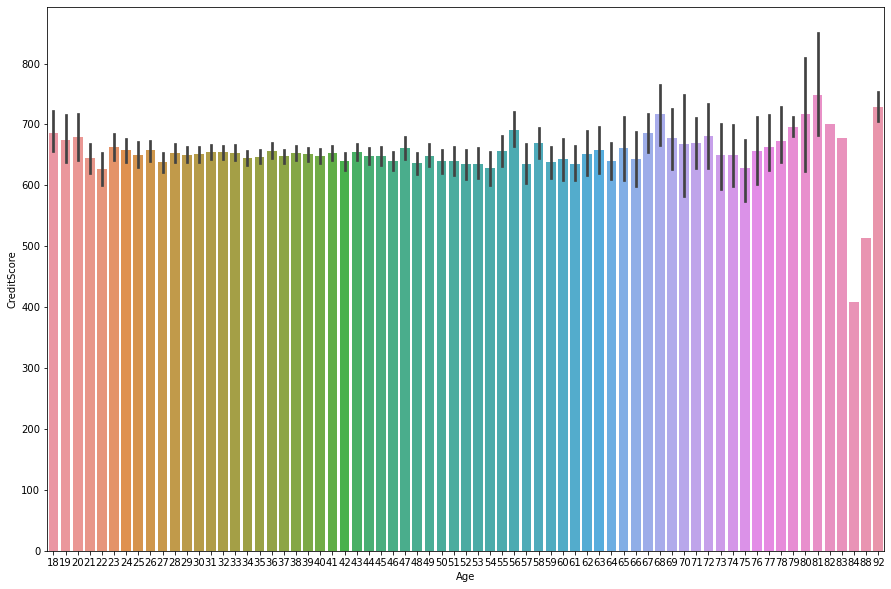

In [18]:
# 나이에 따른 신용점수
plt.figure(figsize=(15,10))
sns.barplot(x=X_train['Age'], y=X_train['CreditScore'])
plt.show()

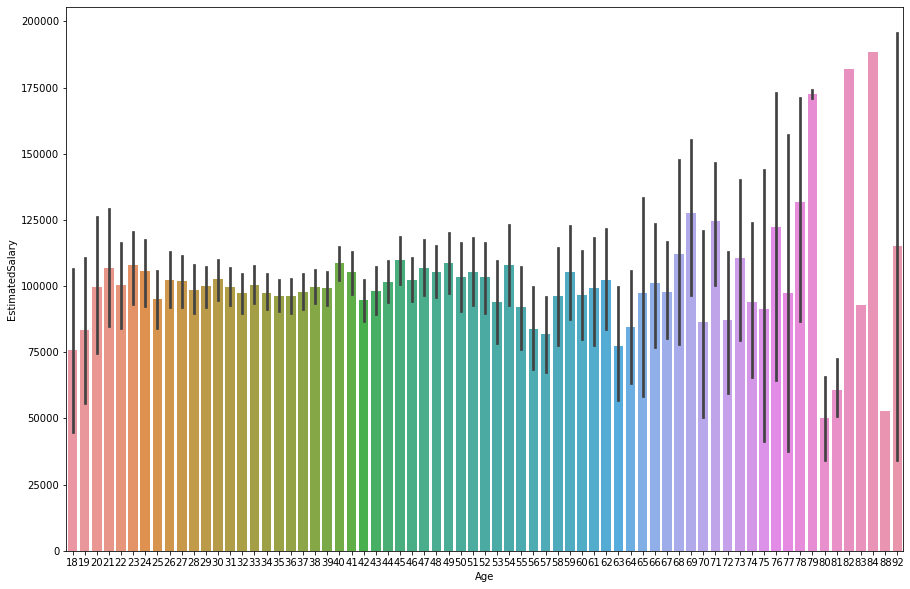

In [19]:
# 나이에 따른 추정 봉급
plt.figure(figsize=(15,10))
sns.barplot(x=X_train['Age'], y=X_train['EstimatedSalary'])
plt.show()

### Null값 확인

In [7]:
X_train.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [8]:
X_train.isna().sum().sum()

0

In [9]:
X_test.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [10]:
X_test.isna().sum().sum()

0

### 불필요한 데이터 제거

### 의사결정 트리 알고리즘을 이용해서 학습과 예측 수행

In [11]:
dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)

print('예측 정확도 : ', accuracy_score(y_test, pred))

ValueError: could not convert string to float: 'Zetticci'